## 1. Problem Understanding and Dataset Overview
Download the dataset: Kaggle House Prices Dataset.
Understand the problem: What factors affect house prices?
Define goals: Predict house prices as accurately as possible.
## 2. Data Cleaning
Handle missing values: Identify columns with missing data and decide how to handle them (e.g., imputation, removal).
Check for inconsistencies: Look for duplicated rows, outliers, and formatting issues.
Standardize numeric data and clean categorical data.
## 3. Exploratory Data Analysis (EDA)
Visualize distributions of features using histograms or box plots.
Use correlation heatmaps to find relationships between numeric features.
Explore feature importance visually (e.g., how does the size of a house affect price?).
Tools:

Pandas, Matplotlib, Seaborn
## 4. Feature Engineering
Create new features:

Total square footage (combine multiple related features).
Age of the house at the time of sale.
Interaction terms (e.g., number of bathrooms × square footage).
Encode categorical variables using techniques like One-Hot Encoding or Label Encoding.

## 5. Model Building
Train a baseline model (e.g., Linear Regression) to evaluate basic performance.
Experiment with more complex models:
Random Forests, Gradient Boosting (e.g., XGBoost, LightGBM)
Use cross-validation to assess generalization.
Fine-tune hyperparameters using GridSearchCV or RandomizedSearchCV.
Tools:

Scikit-learn, XGBoost, LightGBM
## 6. Model Evaluation
Use metrics like RMSE, MAE, and R² to evaluate performance.
Plot actual vs. predicted prices to understand model fit.
## 7. Insights and Documentation
Summarize findings: Which features are most important for predicting house prices?
Create visualizations to make your results easy to understand.
## 8. (Optional) Deployment
Build a simple web app using Flask or Streamlit to showcase your model.
Input: User enters house features.
Output: App predicts the house price.

In [4]:
# Import necessary Libraries
# EDA analysis
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats


In [5]:
# 1. Load the training data into the file
# set the id as the index column
train = pd.read_csv('data/train.csv', index_col=0)

train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#Load test data
test = pd.read_csv('data/test.csv', index_col=0)
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuilt 

In [8]:
# Select the target column
target = train['SalePrice']
target.head()

# remove sale price from train data
train = train.drop(columns=['SalePrice'], axis=1)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Count'>

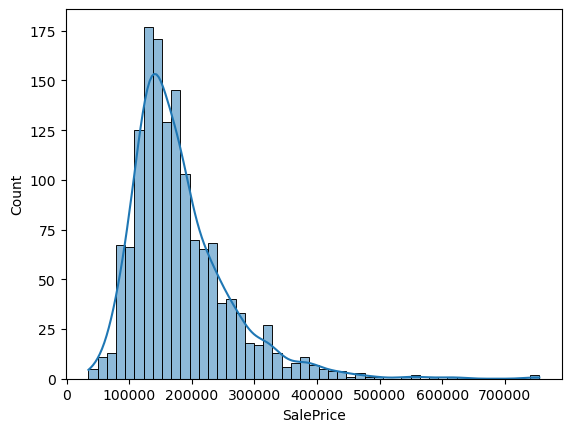

In [9]:
# view the distribution of the sale price column as well
sns.histplot(target, kde=True)

It seems the `SalePrice` column is left skewed. I will apply log transformation to normalize the data and remove skewness.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Count'>

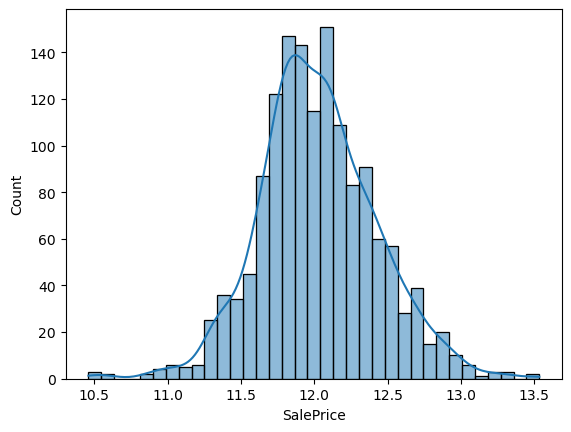

In [10]:
# apply log transofrmation to normalize the data
target = np.log1p(target)  # log(1 + SalePrice) to prevent log(0)
sns.histplot(target, kde=True)


<br>

__NOTE:__ *Later, when making predictions, apply **exp1m(predicted_values)** to revert back to original prices.*
</br>

In [11]:
# concatate the two data frames for cleaning
df = pd.concat([train,test],axis=0)

df.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


__NOTE:__ The test data has  1459 entries, 1461 to 2919.

In [12]:
# Look at the data 
# 1. identify missing values
missing_values = df.isnull().sum() # count columns with null values
missing_values = missing_values[missing_values > 0] # filter columns to those with only null values

print("Null values include:")
print(missing_values)

Null values include:
MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType      1766
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64


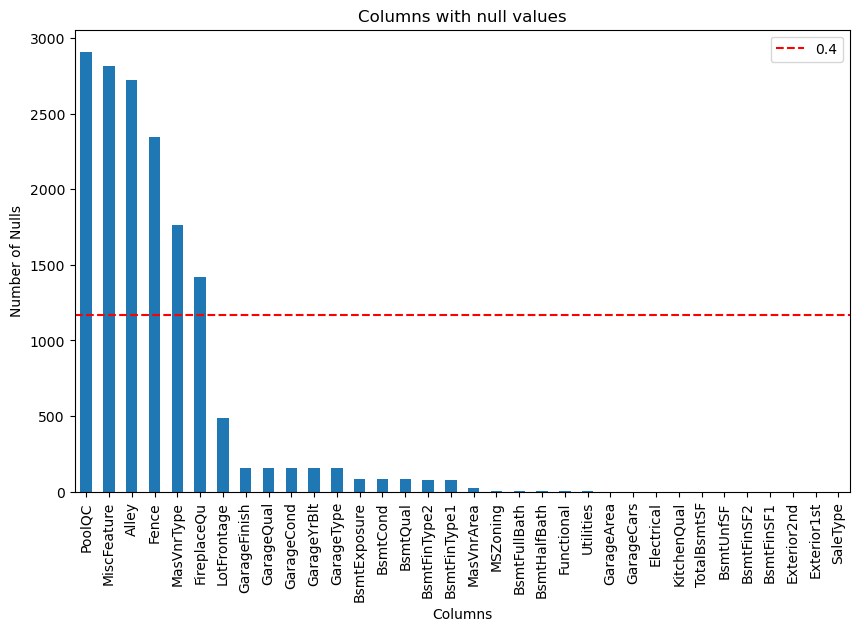

In [13]:
# Visulaize missing values using bar chart
missing_values.sort_values(ascending=False).plot(kind='bar', figsize=(10,6), title='Columns with null values')
plt.axhline(y=np.ceil(len(df)*0.4), color='r', linestyle='--', label='0.4')
plt.xlabel("Columns")
plt.ylabel("Number of Nulls")
plt.legend()
plt.show;

__Note:__ The columns with more than 60% the data missing can be deleted because they will be more work to fill in or find proper substitutes. The total number of rows are 2919. However, further investigation is required. 

In [14]:
# 2. identify the data types
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

In [15]:
# 3. identify the counts of the data
train.describe() # shows the stats of numerical columns

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


## Data Cleaning

The data cleaning will have several steps. The first is to remove columns with more that half the data missing then with numeric and categorical columns seperately. 

In [16]:
# Removing columns with more that half the data missing
df = df.copy() # Make a copy of original data so as not to alter it.
# from the graph the columns with more than 60% the missing data are:
# ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu']


In [17]:
# Drop columns
to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType','FireplaceQu']
df = df.drop(columns=to_drop)
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [18]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


We now have 73 columns.

Let's move on to filling the missing values

## Numeric Columns

### 1. Handling Missing Values

In [19]:
# Select all numeric data types
numeric = df.select_dtypes(include=np.number)
numeric.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [20]:
def plot_distributions_grid(df):
    # Calculate grid dimensions
    n_cols = int(np.ceil(np.sqrt(len(df.columns))))
    n_rows = int(np.ceil(len(df.columns) / n_cols))
    
    # Create figure with specified size
    fig = plt.figure(figsize=(15, 15))
    
    # Create subplots for each column
    for idx, col_name in enumerate(df.columns, 1):
        ax = fig.add_subplot(n_rows, n_cols, idx)
        
        # Create distribution plot
        sns.histplot(data=df, x=col_name, ax=ax, kde=True)
        
        # Rotate x-axis labels if they're too long
        ax.tick_params(axis='x', rotation=45)
        
        # Set title for each subplot
        ax.set_title(col_name, fontsize=10)
        
        # Make y-axis labels smaller
        ax.tick_params(axis='both', which='major', labelsize=8)
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    return fig

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

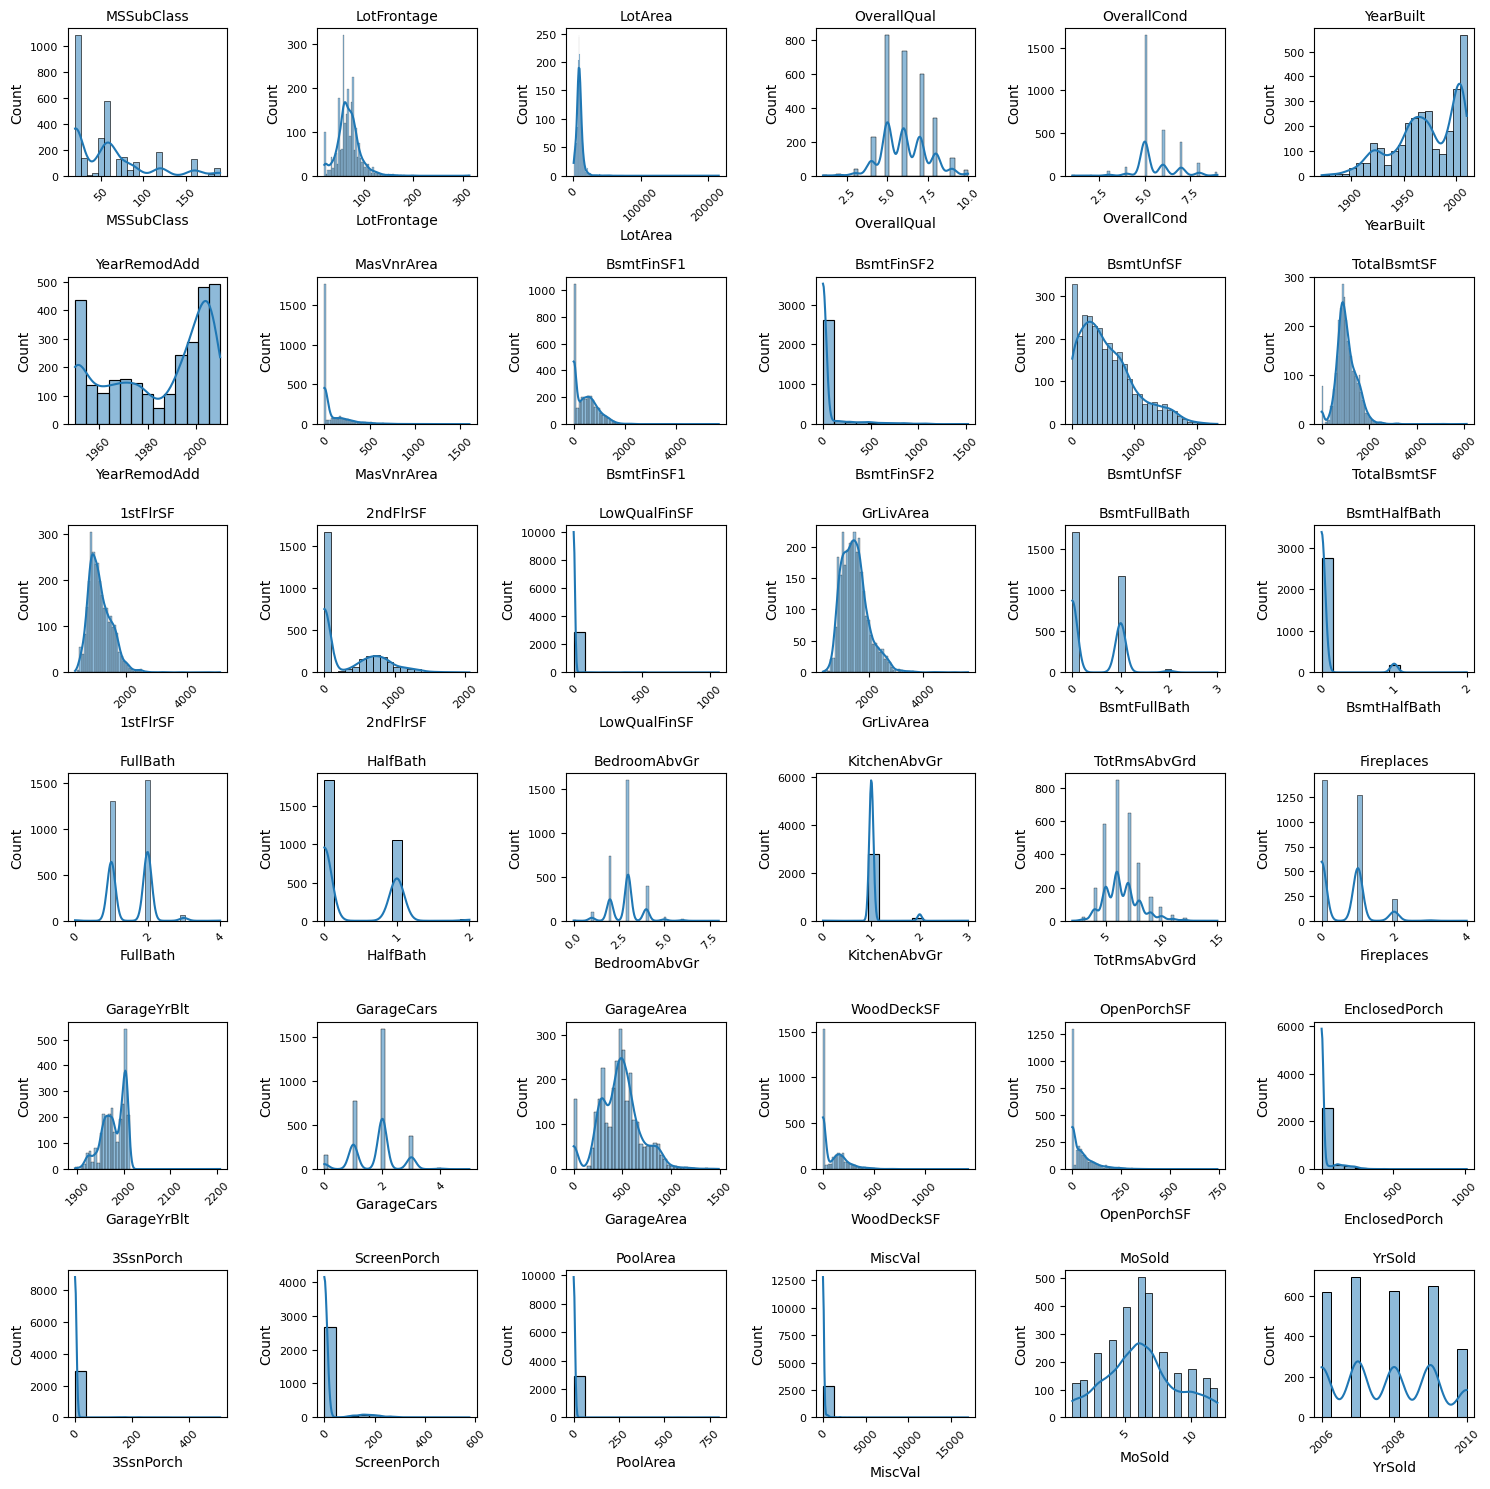

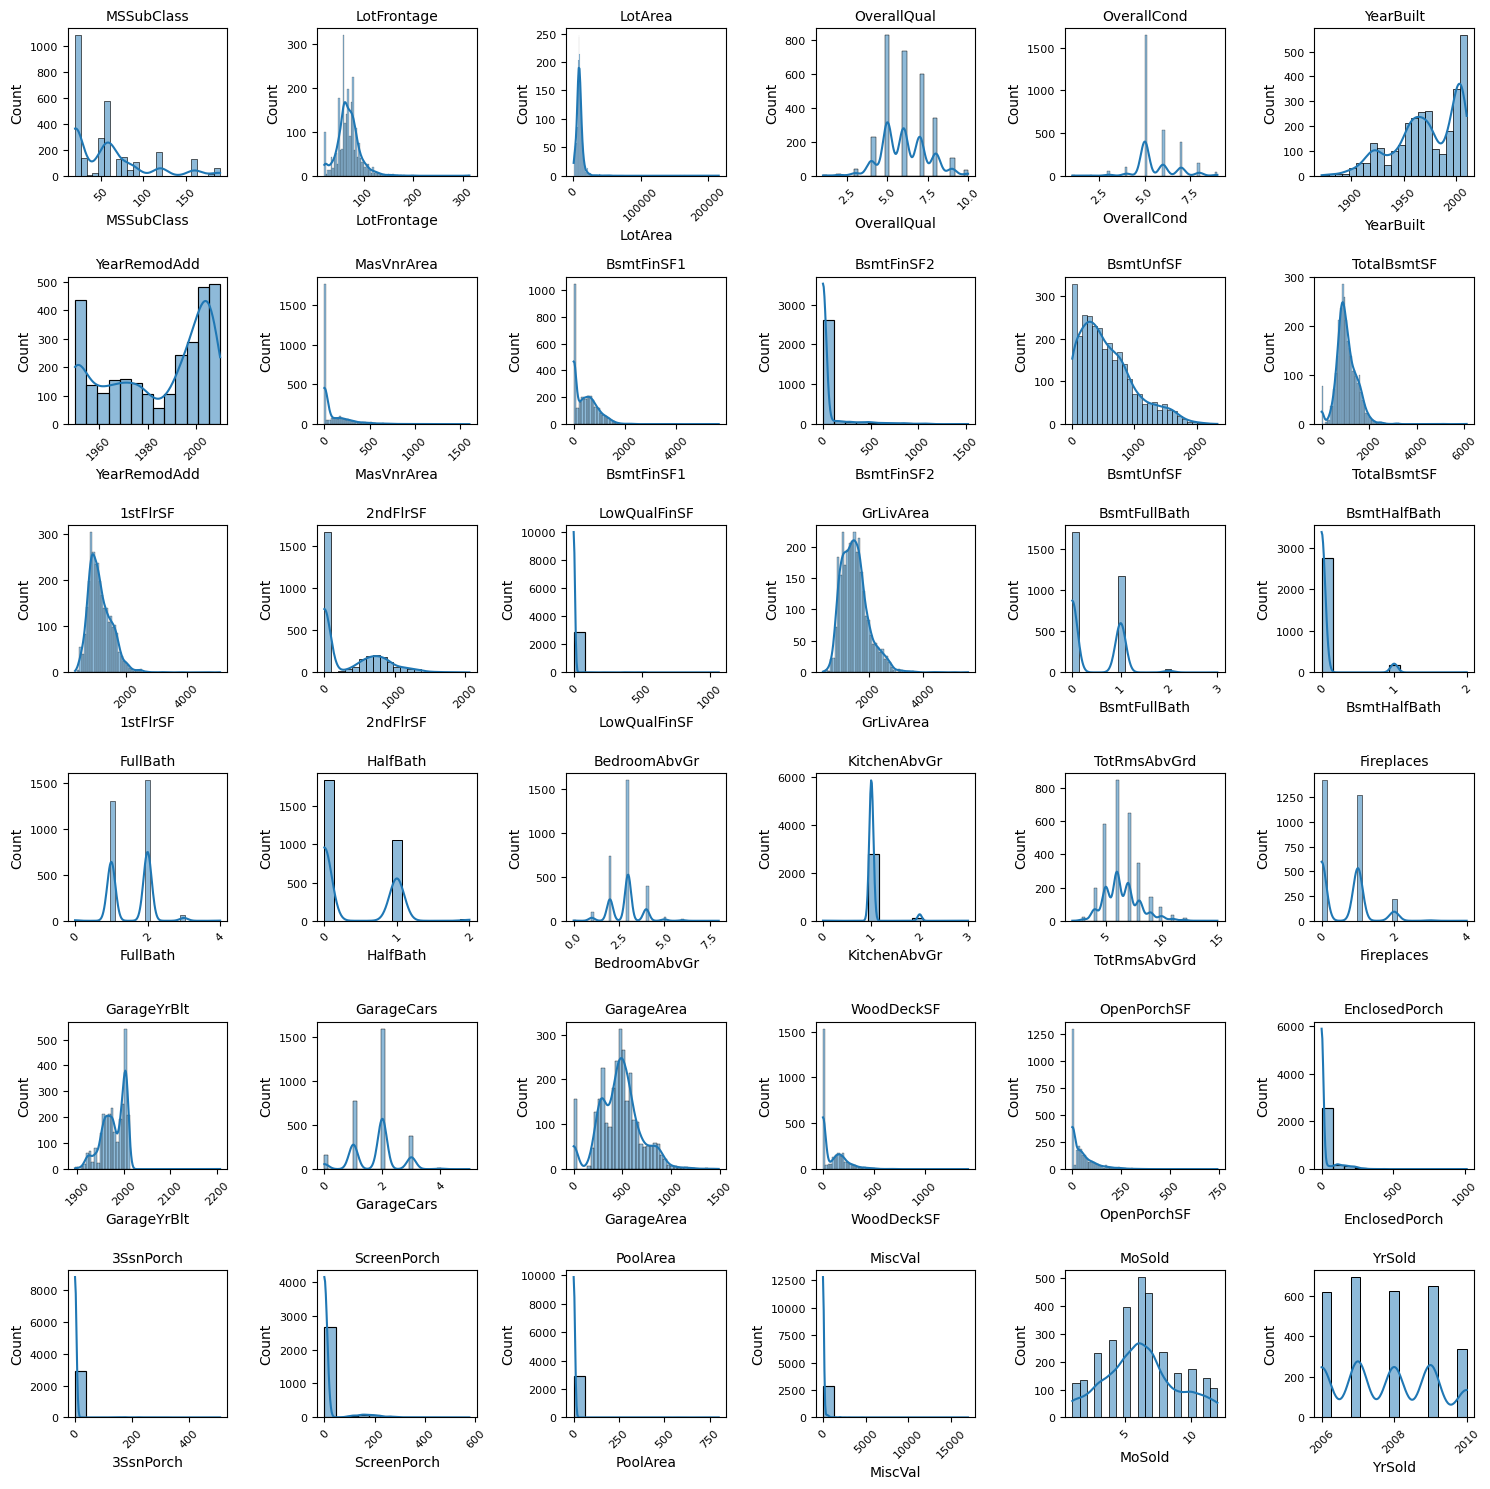

In [21]:
plot_distributions_grid(numeric)

Since most of the data is not normally distributed, fill the null values with the mean value for each column.

In [22]:
# Fill null values
for column in numeric:
    numeric[column] = numeric[column].fillna(numeric[column].mean())

In [23]:
# check for nulls
numeric.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

### 2. Handling Outliers

In [24]:
# Check for outliers
numeric.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,21.312345,7886.996359,1.409947,1.113131,30.291442,20.894344,178.626089,455.532750,169.176615,...,215.357904,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,60.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,69.305795,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,369.000000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,78.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,163.500000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


Create a function to help with plotting the outliers for numeric columns. 

In [25]:
def plot_outliers(
    df,
    figsize=(15, 15),
    fontsize=10,
    showfliers=True,
    title="Boxplot of Numeric Columns",
):
    fig = plt.figure(figsize=figsize)
    sns.boxplot(data=df, showfliers=showfliers)
    plt.title(title, fontsize=fontsize)
    plt.xticks(rotation=45)
    plt.show();

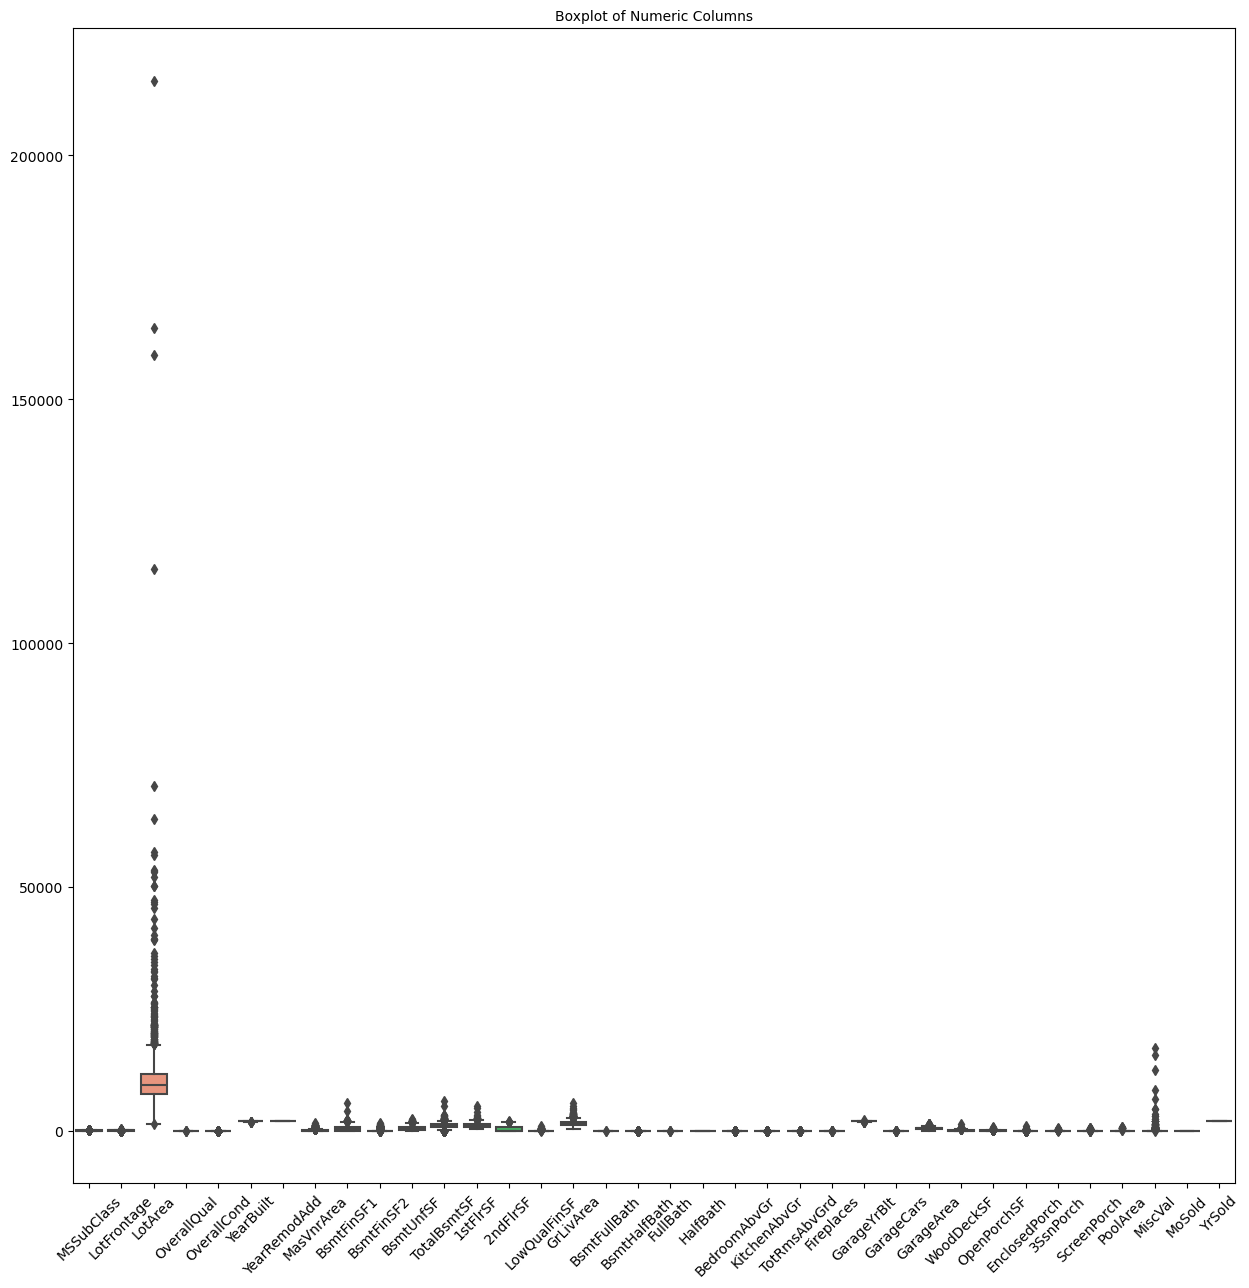

In [26]:
# Plot outliers using box plots
plot_outliers(numeric)

It seems the `'LotFrontage'` column is skewed. Let us examine the individual column. 

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='LotFrontage', ylabel='Count'>

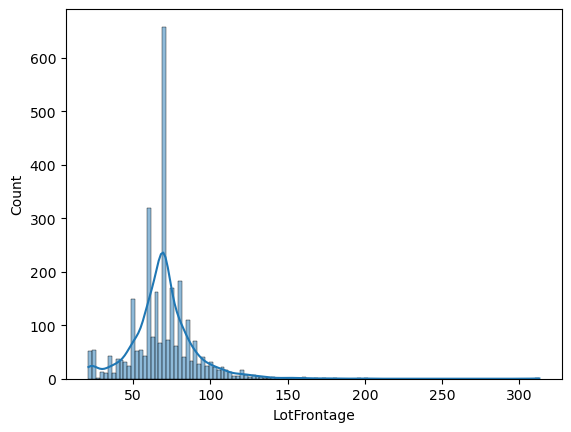

In [27]:
# View the distribution
sns.histplot(numeric['LotFrontage'], kde=True)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='LotFrontage', ylabel='Count'>

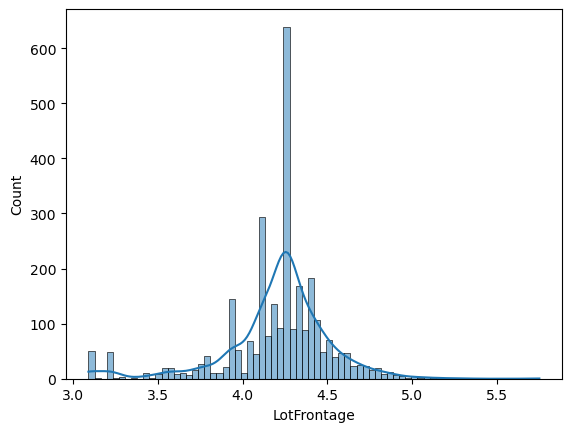

In [28]:
# apply log transofrmation to normalize the data
numeric['LotFrontage'] = np.log1p(numeric['LotFrontage'])  # log(1 + LotFrontage) to prevent log(0)
sns.histplot(numeric['LotFrontage'], kde=True)


## Categorical Columns

In [29]:
# Split the data
categorical = df.select_dtypes(include=['category', 'object'])
categorical

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,Y,WD,Normal
2916,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,SBrkr,TA,Typ,CarPort,Unf,TA,TA,Y,WD,Abnorml
2917,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml


In [30]:
categorical.isnull().sum()

MSZoning           4
Street             0
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        1
Functional         2
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
PavedDrive         0
SaleType           1
SaleCondition      0
dtype: int64

Based on the data description, there is a special category called `Other`, `Unkown`, `None` or `NA` for each column. First we will create a dictionary that maps each column to it's special category.

In [31]:
# Fill null values
for column in categorical:
    categorical[column] = categorical[column].fillna('None')

In [32]:
# Check for missing values
categorical.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [33]:
for column in categorical:
  print(f"""The unique values are:
  {categorical[column].value_counts()}""")

The unique values are:
  MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
None          4
Name: count, dtype: int64
The unique values are:
  Street
Pave    2907
Grvl      12
Name: count, dtype: int64
The unique values are:
  LotShape
Reg    1859
IR1     968
IR2      76
IR3      16
Name: count, dtype: int64
The unique values are:
  LandContour
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: count, dtype: int64
The unique values are:
  Utilities
AllPub    2916
None         2
NoSeWa       1
Name: count, dtype: int64
The unique values are:
  LotConfig
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: count, dtype: int64
The unique values are:
  LandSlope
Gtl    2778
Mod     125
Sev      16
Name: count, dtype: int64
The unique values are:
  Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel  

Since the neighbourhood feature has multiple categories,it will be removed

In [34]:
# Remove neighboorhood column
categorical = categorical.drop(columns='Neighborhood', axis=1)

In [35]:
# Concatanate the two dataframes into one
df = pd.concat([numeric, categorical],axis=1)

In [36]:
df.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
                ..
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
Length: 72, dtype: int64

### 2. Handling Duplicates

In [37]:
# Check for duplicates
df.duplicated().sum()

2

In [38]:
# drop the duplicates
df = df.drop_duplicates()

df.duplicated().sum()


0

## Feature Engineering

### 1. Create new features from columns
The year columns have no meaning as year values but showing ages would be more meaningful. 

In [39]:
df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType'

In [40]:
# create ages
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df['RemodelAge'] = df['YrSold'] - df['YearRemodAdd']
df['GarageAge'] = df['YrSold'] - df['GarageYrBlt']

In [41]:
# remove old columns
old_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

df = df.drop(columns=old_cols, axis=1)

In [42]:
# create total features
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF'] #(Total square footage)
df['TotalBath'] = df['FullBath'] + (df['HalfBath'] *0.5 ) + df['BsmtFullBath'] + (df['BsmtHalfBath']*0.5)

In [43]:
# view the new features
df['TotalBath'].value_counts()

TotalBath
2.000000    901
2.500000    557
1.000000    442
3.000000    378
1.500000    293
3.500000    288
4.000000     31
4.500000     17
5.000000      3
7.000000      3
6.000000      2
1.460576      1
3.960576      1
Name: count, dtype: int64

In [44]:
# Creating columns for luxury features
df['HasPool'] = (df['PoolArea'] > 0).astype(int)
df['HasGarage'] = (df['GarageArea'] > 0).astype(int)
df['HasBasement'] = (df['TotalBsmtSF'] > 0).astype(int)

In [45]:
# Preview of binary features
df[['PoolArea', 'HasPool', 'GarageArea', 'HasGarage', 'TotalBsmtSF', 'HasBasement']].head(10)


,PoolArea,HasPool,GarageArea,HasGarage,TotalBsmtSF,HasBasement
Id,,,,,,
1,0,0,548.0,1,856.0,1
2,0,0,460.0,1,1262.0,1
3,0,0,608.0,1,920.0,1
4,0,0,642.0,1,756.0,1
5,0,0,836.0,1,1145.0,1
6,0,0,480.0,1,796.0,1
7,0,0,636.0,1,1686.0,1
8,0,0,484.0,1,1107.0,1
9,0,0,468.0,1,952.0,1


### 3. Get dummies from categorical values

In [46]:
#Convert Categories to dummies
df = pd.get_dummies(df, drop_first=True, dtype=float)

df.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,4.189655,8450,7,5,196.0,706.0,0.0,150.0,856.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,20,4.394449,9600,6,8,0.0,978.0,0.0,284.0,1262.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,60,4.234107,11250,7,5,162.0,486.0,0.0,434.0,920.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,70,4.110874,9550,7,5,0.0,216.0,0.0,540.0,756.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,60,4.442651,14260,8,5,350.0,655.0,0.0,490.0,1145.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## Feature Seletion

Selecting features by removing features that have high colinearity.

In [47]:
# 1. View the correlation matrix
corr_matrix = df.corr().abs()

corr_matrix

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
MSSubClass,1.000000,0.499747,0.200591,0.032636,0.064920,0.006152,0.062841,0.072181,0.127099,0.219413,...,0.001307,0.040323,0.016174,0.018073,0.039337,0.011383,0.037592,0.023024,0.026627,0.044891
LotFrontage,0.499747,1.000000,0.347787,0.175676,0.047910,0.153454,0.163930,0.038421,0.121708,0.305554,...,0.039712,0.100190,0.014354,0.000483,0.072290,0.046145,0.011143,0.018239,0.070635,0.098424
LotArea,0.200591,0.347787,1.000000,0.101016,0.035969,0.125117,0.193502,0.083889,0.021711,0.253853,...,0.015772,0.031414,0.008446,0.004101,0.013778,0.020478,0.024189,0.017849,0.022599,0.033245
OverallQual,0.032636,0.175676,0.101016,1.000000,0.093644,0.431245,0.282264,0.042632,0.274926,0.549536,...,0.045131,0.338521,0.014295,0.052769,0.194304,0.049615,0.040704,0.023553,0.134517,0.333384
OverallCond,0.064920,0.047910,0.035969,0.093644,1.000000,0.135924,0.050761,0.041392,0.138018,0.174211,...,0.014837,0.148243,0.007237,0.018597,0.162712,0.051863,0.025770,0.032105,0.168614,0.143683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,0.011383,0.046145,0.020478,0.049615,0.051863,0.018650,0.028125,0.018847,0.006623,0.042909,...,0.003370,0.019200,0.001190,0.003152,0.025398,1.000000,0.005854,0.008135,0.138477,0.019462
SaleCondition_Alloca,0.037592,0.011143,0.024189,0.040704,0.025770,0.018013,0.026052,0.026709,0.061448,0.044609,...,0.004776,0.027210,0.001687,0.004467,0.035993,0.005854,1.000000,0.011529,0.196242,0.027580
SaleCondition_Family,0.023024,0.018239,0.017849,0.023553,0.032105,0.018017,0.026326,0.002022,0.024085,0.003966,...,0.045979,0.037814,0.002344,0.050032,0.014385,0.008135,0.011529,1.000000,0.272724,0.038329
SaleCondition_Normal,0.026627,0.070635,0.022599,0.134517,0.168614,0.069283,0.017393,0.068874,0.150021,0.141142,...,0.007174,0.643656,0.008595,0.087325,0.620299,0.138477,0.196242,0.272724,1.000000,0.652417


Some features might be highly correlated (e.g., 1stFlrSF and TotalSF). We can drop one of each pair with correlation > 0.9.

In [48]:
# Remove Highly Correlated Features
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Drop features with high correlation (> 0.9)
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
df = df.drop(columns=high_corr_features)
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
Id,,,,,,,,,,,,,,,,,,,,,
1,60,4.189655,8450,7,5,196.0,706.0,0.0,150.0,856.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,20,4.394449,9600,6,8,0.0,978.0,0.0,284.0,1262.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,60,4.234107,11250,7,5,162.0,486.0,0.0,434.0,920.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,70,4.110874,9550,7,5,0.0,216.0,0.0,540.0,756.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,60,4.442651,14260,8,5,350.0,655.0,0.0,490.0,1145.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [49]:
# split the dataframe into train and test data
clean_train = df.iloc[:len(train)]
clean_test = df.iloc[len(test):]

In [50]:
clean_train.tail()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
Id,,,,,,,,,,,,,,,,,,,,,
1456,60,4.143135,7917,6,5,0.0,0.0,0.0,953.0,953.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1457,20,4.454347,13175,6,6,119.0,790.0,163.0,589.0,1542.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1458,70,4.204693,9042,7,9,0.0,275.0,0.0,877.0,1152.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1459,20,4.234107,9717,5,6,0.0,49.0,1029.0,0.0,1078.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1460,20,4.330733,9937,5,6,0.0,830.0,290.0,136.0,1256.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [51]:
clean_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
Id,,,,,,,,,,,,,,,,,,,,,
1460,20,4.330733,9937,5,6,0.0,830.0,290.0,136.0,1256.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1461,20,4.394449,11622,5,6,0.0,468.0,144.0,270.0,882.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1462,20,4.406719,14267,6,6,108.0,923.0,0.0,406.0,1329.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1463,60,4.317488,13830,5,5,0.0,791.0,0.0,137.0,928.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1464,60,4.369448,9978,6,6,20.0,602.0,0.0,324.0,926.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [52]:
# Add the sale price column
clean_train['SalePrice'] = target

clean_train.tail()

C:\Users\CINDY\AppData\Local\Temp\ipykernel_14320\1460611064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_train['SalePrice'] = target


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1456,60,4.143135,7917,6,5,0.0,0.0,0.0,953.0,953.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,12.072547
1457,20,4.454347,13175,6,6,119.0,790.0,163.0,589.0,1542.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,12.254868
1458,70,4.204693,9042,7,9,0.0,275.0,0.0,877.0,1152.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,12.493133
1459,20,4.234107,9717,5,6,0.0,49.0,1029.0,0.0,1078.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,11.864469
1460,20,4.330733,9937,5,6,0.0,830.0,290.0,136.0,1256.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,11.901590


In [53]:
# Save the clean data in a new file

clean_train.to_csv('cleaned_training_data.csv')
clean_test.to_csv('cleaned_testing_data.csv')
